In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np

import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from LoadRealRunningJumping import *
from LoadSyntheticRunningJumping import *

from dataLoader import *

import torch.fft as fft

from Evaluate import DagharUniclassEvaluation

from sklearn.manifold import TSNE


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:55: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


Data path is located in: /workspaces/container-workspace/DAHAR_GANs/
Models path is located in: /workspaces/container-workspace/tts-gan/pre-trained-models/training_model/Daghar-models/Run_5000_D_30/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is run
data shape is (15989, 3, 1, 30)
label shape is (15989,)

 Synthetic Set:
Checkpoint epochs: 5
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/dataLoader.py:320: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  self.class_data = torch.tensor(class_data)
/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via thi

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 4.047659
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.888184
[t-SNE] KL divergence after 300 iterations: 2.240343


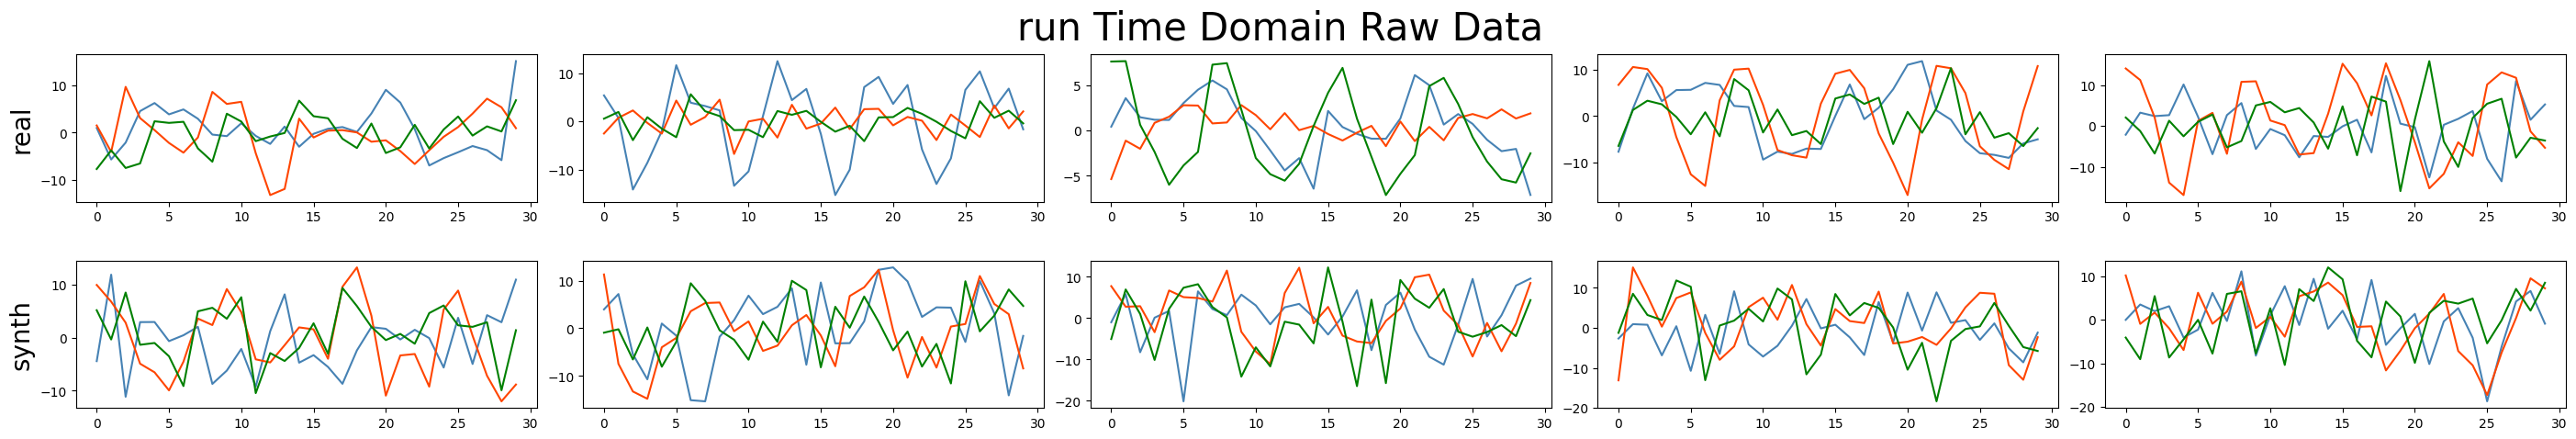

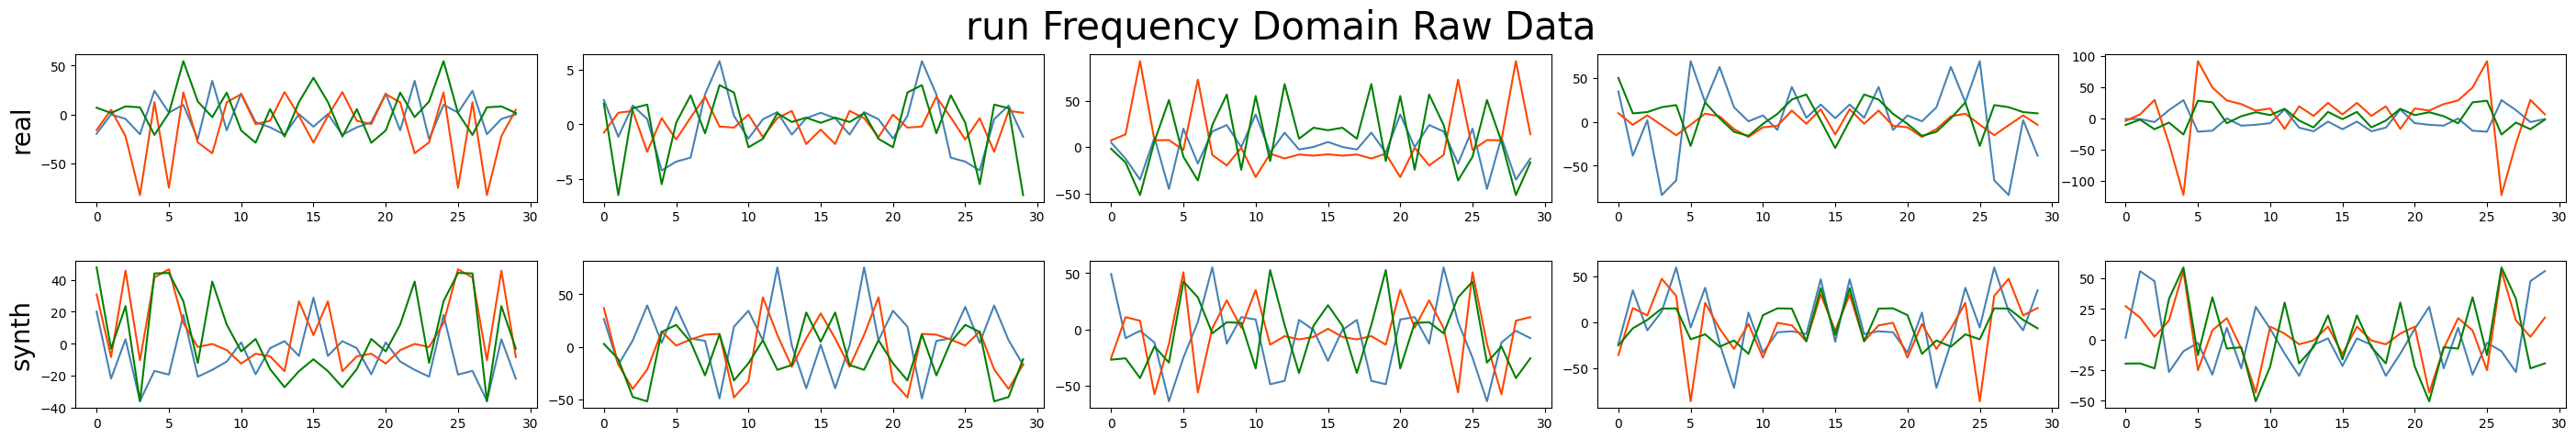

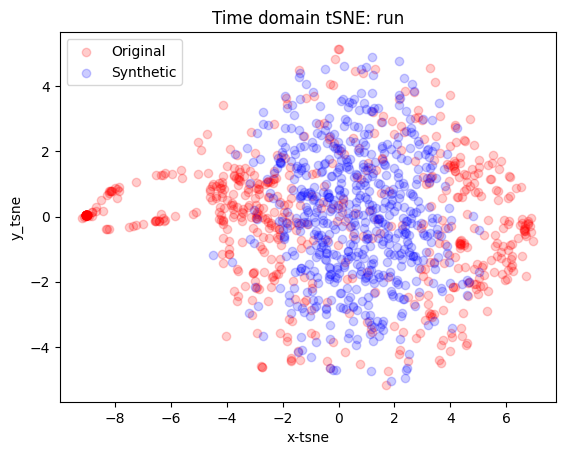

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 21.266925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.383347
[t-SNE] KL divergence after 300 iterations: 1.611644


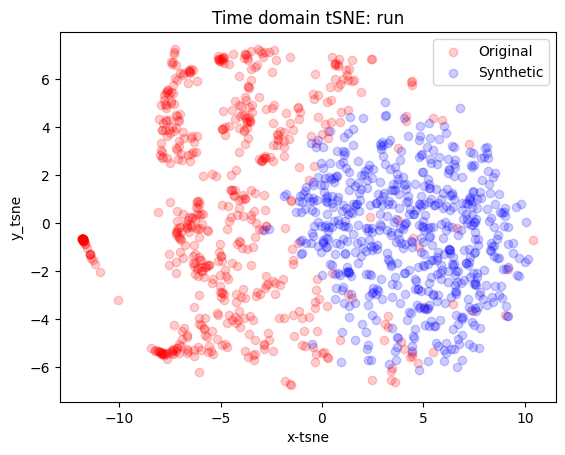

In [2]:
eval = DagharUniclassEvaluation(data_path='/workspaces/container-workspace/DAHAR_GANs/',
                                models_path='/workspaces/container-workspace/tts-gan/pre-trained-models/training_model/Daghar-models/Run_5000_D_30/',
                                class_name='run',
                                seq_len=30)

In [9]:
models_path = '/workspaces/container-workspace/tts-gan/pre-trained-models/training_model/Daghar-models/'
directorys = os.listdir('/workspaces/container-workspace/tts-gan/pre-trained-models/training_model/Daghar-models')
directorys

['Walk_50000_D_30',
 'Sit_50000_D_30',
 'Downstairs_50000_D_30',
 'Upstairs_5000_D_30',
 'Run_50000_D_30',
 'Walk_5000_D_30',
 'Downstairs_5000_D_30',
 'Stand_5000_D_30',
 'Run_5000_D_30',
 'Sit_5000_D_30',
 'Upstairs_50000_D_30',
 'Stand_50000_D_30']

In [11]:
def extract_dataloader(dataloader):
    data = []
    for i, (real_sig, label) in enumerate(dataloader):
        real_sig = real_sig.cpu().detach().numpy()
        sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
        data.append(sig)

    return np.array(data)

'''#save 600 synthetic data
for directory in directorys:
    syn_set = Single_Class_Synthetic_Dataset(path = models_path + directory + '/checkpoint', seq_len=30, sample_size=600)
    syn_data_loader = data.DataLoader(syn_set, batch_size=1, num_workers=1, shuffle=False)
    syn_data = extract_dataloader(syn_data_loader)
    print(syn_data.shape)
    np.save("/workspaces/container-workspace/tts-gan/Notebooks/Daghar_data/" + directory, arr = syn_data)
    
'''